In [19]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statannotations.Annotator import Annotator
from xarray.ufuncs import angle

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [20]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [21]:
# Add index "Id"
df['Id'] = np.arange(1, df.shape[0] + 1)
df.insert(0, 'Id', df.pop('Id'))

In [22]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'sex_options': {
        'Male': 0,
        'Female': 1,
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'Loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Separate households': 0,
        'Cohabiting': 1,
    },
    'work-options': {
        'Home': 0,
        'Part-time activity': 1,
        'Full time activity': 2,
    },
    'rel_sex-options': {
        'Different sex': 0,
        'Same sex': 1
    },
    'germany-options': {
        'East Germany': 0,
        'West Germany': 1,
    },
    'urbanization-options': {
        'Rural area': 0,
        'Town or suburb': 1,
        'City': 2,
    },
    'married-options': {
        'Not married': 0,
        'Married': 1,
    },
    'age_diff_options': {
        '> 10y. older partner': 3,
        '> 10y. younger partner': -3,
        '2-5y. older partner': 2,
        '2-5y. younger partner': -2,
        '6-10y. older partner': 1,
        '6-10y. younger partner': -1,
        'Same age': 0
    },
    'kid_age_options': {
        "0-1": 1,
        "2-5": 2,
        "6-13": 3,
        "14-17": 4,
        "18+": 5
    }
}

In [23]:
# Change column names
col_names = {
    # TOUCH-RELATED
    'omo15i1_w2b': 'Anchor Kiss Frequency',
    'omo15i2_w2b': 'Anchor Kiss Wish',
    'pomo15i1_w2b': 'Partner Kiss Frequency',
    'pomo15i2_w2b': 'Partner Kiss Wish',
    'omo16i1_w2b': 'Anchor Hold Frequency',
    'omo16i2_w2b': 'Anchor Hold Wish',
    'pomo16i1_w2b': 'Partner Hold Frequency',
    'pomo16i2_w2b': 'Partner Hold Wish',
    'omo17i1_w2b': 'Anchor Hug Frequency',
    'omo17i2_w2b': 'Anchor Hug Wish',
    'pomo17i1_w2b': 'Partner Hug Frequency',
    'pomo17i2_w2b': 'Partner Hug Wish',

    # SOCIODEMOGRAPHICS
    'sex': 'Anchor Sex',  # Female, Male, Diverse
    'psex': 'Partner Sex',  # Female, Male, Diverse
    'age': 'Anchor Age',  # int
    'page': 'Partner Age',  # int
    'workst': 'Anchor Work Status',  # Full-time activity, Part-time activity, Home
    'pworkst': 'Partner Work Status',  # Full-time activity, Part-time activity, Home
    'east': 'Anchor East',  # East, West
    'peast': 'Partner East',  # East, West
    'degurba': 'Anchor Urbanization',
    'pdegurba': 'Partner Urbanization',

    #PERSONALITY
    'extr': 'Anchor Extraversion',
    'pextr': 'Partner Extraversion',
    'agree': 'Anchor Agreeableness',
    'pagree': 'Partner Agreeableness',
    'consc': 'Anchor Conscientiousness',
    'pconsc': 'Partner Conscientiousness',
    'open': 'Anchor Openness',
    'popen': 'Partner Openness',
    'neur': 'Anchor Neuroticism',
    'pneur': 'Partner Neuroticism',
    'consv': 'Anchor Conservatism',
    'pconsv': 'Partner Conservatism',
    'god': 'Anchor Religiosity',
    'pgod': 'Partner Religiosity',

    #WELLBEING
    'depr': 'Anchor Depressiveness',
    'pdepr': 'Partner Depressiveness',
    'loneliness': 'Anchor Loneliness',
    'ploneliness': 'Partner Loneliness',
    'self': 'Anchor Self-esteem',
    'pself': 'Partner Self-esteem',
    'lifsat': 'Anchor Life Satisfaction',
    'plifsat': 'Partner Life Satisfaction',
    'health': 'Anchor Health',
    'phealth': 'Partner Health',

    #RELATIONSHIP
    'samesex': 'Relationship Sex',
    'reldur_class': 'Relationship Length',
    'ykage_class_w2b': 'Kid Age',
    'married': 'Married',
    'cohab': 'Cohabitation',
    'nkidsliv_class': 'Kids',
    'relint': 'Anchor Communication Quality',
    'prelint': 'Partner Communication Quality',
    'relsat': 'Anchor Relationship Satisfaction',
    'prelsat': 'Partner Relationship Satisfaction',
    'confm': 'Anchor Conflict Management',
    'pconfm': 'Partner Conflict Management',
    'agediff_class': 'Age difference',
}

# Rename columns to ease understanding
df = df.rename(
    columns=col_names
)

In [24]:
# Drop unused columns
df = df.drop([
    'reldur', 'tf_kiss', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1).reset_index(
    drop=True)

In [25]:
# Dummy code varibles
df['Anchor Relationship Satisfaction'] = df['Anchor Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner Relationship Satisfaction'] = df['Partner Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor Life Satisfaction'] = df['Anchor Life Satisfaction'].map(overall_options["satisfaction_options"])
df['Partner Life Satisfaction'] = df['Partner Life Satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor Sex'] = df['Anchor Sex'].map(overall_options["sex_options"])
df['Anchor Kiss Frequency'] = df['Anchor Kiss Frequency'].map(overall_options["omo_options"])
df['Anchor Hold Frequency'] = df['Anchor Hold Frequency'].map(overall_options["omo_options"])
df['Anchor Hug Frequency'] = df['Anchor Hug Frequency'].map(overall_options["omo_options"])
df['Anchor Kiss Wish'] = df['Anchor Kiss Wish'].map(overall_options["omo_options"])
df['Anchor Hold Wish'] = df['Anchor Hold Wish'].map(overall_options["omo_options"])
df['Anchor Hug Wish'] = df['Anchor Hug Wish'].map(overall_options["omo_options"])

df['Partner Sex'] = df['Partner Sex'].map(overall_options["sex_options"])
df['Partner Kiss Frequency'] = df['Partner Kiss Frequency'].map(overall_options["omo_options"])
df['Partner Hold Frequency'] = df['Partner Hold Frequency'].map(overall_options["omo_options"])
df['Partner Hug Frequency'] = df['Partner Hug Frequency'].map(overall_options["omo_options"])
df['Partner Kiss Wish'] = df['Partner Kiss Wish'].map(overall_options["omo_options"])
df['Partner Hold Wish'] = df['Partner Hold Wish'].map(overall_options["omo_options"])
df['Partner Hug Wish'] = df['Partner Hug Wish'].map(overall_options["omo_options"])

df['Relationship Length'] = df['Relationship Length'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor Loneliness'] = df['Anchor Loneliness'].map(overall_options['Loneliness_options'])
df['Partner Loneliness'] = df['Partner Loneliness'].map(overall_options['Loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])

df['Anchor Work Status'] = df['Anchor Work Status'].map(overall_options['work-options'])
df['Partner Work Status'] = df['Partner Work Status'].map(overall_options['work-options'])

df['Anchor East'] = df['Anchor East'].map(overall_options['germany-options'])
df['Partner East'] = df['Partner East'].map(overall_options['germany-options'])

df['Anchor Urbanization'] = df['Anchor Urbanization'].map(overall_options['urbanization-options'])
df['Partner Urbanization'] = df['Partner Urbanization'].map(overall_options['urbanization-options'])

df['Married'] = df['Married'].map(overall_options['married-options'])

df['Relationship Sex'] = df['Relationship Sex'].map(overall_options['rel_sex-options'])

df['Age difference'] = df['Age difference'].map(overall_options['age_diff_options'])

df['Kid Age'] = df['Kid Age'].map(overall_options['kid_age_options']).fillna(0)

In [26]:
# Remove nan in touch variables (since they are our target)
col_names = [
    'Anchor Kiss Frequency',
    'Anchor Kiss Wish',
    'Partner Kiss Frequency',
    'Partner Kiss Wish',
    'Anchor Hold Frequency',
    'Anchor Hold Wish',
    'Partner Hold Frequency',
    'Partner Hold Wish',
    'Anchor Hug Frequency',
    'Anchor Hug Wish',
    'Partner Hug Frequency',
    'Partner Hug Wish',
]
df = df.dropna(subset=col_names).reset_index(drop=True)

In [27]:
# Calculate mean Frequency
df['Anchor Frequency of Touch'] = (df[['Anchor Kiss Frequency', 'Anchor Hold Frequency', 'Anchor Hug Frequency']].
                                   mean(axis=1))
df['Partner Frequency of Touch'] = (df[['Partner Kiss Frequency', 'Partner Hold Frequency', 'Partner Hug Frequency']].
                                    mean(axis=1))
df['Couple Frequency of Touch'] = (df[['Anchor Frequency of Touch', 'Partner Frequency of Touch']].
                                   mean(axis=1))

# Calculate mean Wish
df['Anchor Wish for Touch'] = (df[['Anchor Kiss Wish', 'Anchor Hold Wish', 'Anchor Hug Wish']].
                               mean(axis=1))
df['Partner Wish for Touch'] = (df[['Partner Kiss Wish', 'Partner Hold Wish', 'Partner Hug Wish']].
                                mean(axis=1))
df['Couple Wish for Touch'] = (df[['Anchor Wish for Touch', 'Partner Wish for Touch']].
                               mean(axis=1))

# Calculate individual differences
df['Anchor Kiss Difference'] = df['Anchor Kiss Wish'] - df['Anchor Kiss Frequency']
df['Anchor Hold Difference'] = df['Anchor Hold Wish'] - df['Anchor Hold Frequency']
df['Anchor Hug Difference'] = df['Anchor Hug Wish'] - df['Anchor Hug Frequency']

df['Partner Kiss Difference'] = df['Partner Kiss Wish'] - df['Partner Kiss Frequency']
df['Partner Hold Difference'] = df['Partner Hold Wish'] - df['Partner Hold Frequency']
df['Partner Hug Difference'] = df['Partner Hug Wish'] - df['Partner Hug Frequency']

In [28]:
# make sure data is correct
df = df[(df['Anchor Age'] != -7) & (df['Partner Age'] != -7)].reset_index(drop=True)

In [29]:
# Optional, drop every NaN
# df.dropna()

In [30]:
df['Anchor Divergence'] = df['Anchor Wish for Touch'] - df['Anchor Frequency of Touch']
df['Partner Divergence'] = df['Partner Wish for Touch'] - df['Partner Frequency of Touch']
df['Couple Divergence'] = df['Couple Wish for Touch'] - df['Couple Frequency of Touch']

In [31]:
# I am okay, and my partner is okay
condition1 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] == 0)
)

# I am deprived and my partner is okay
condition2 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] == 0)
)

# I am deprived and my partner is also deprived
condition3 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] > 0)
)

# I am deprived but my partner is saturated
condition4 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] < 0)
)

# I am saturated and my partner is okay
condition5 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] == 0)
)

# I am saturated and my partner is also saturated
condition6 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] < 0)
)

# I am okay but my partner is deprived
condition7 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] > 0)
)

# I am okay but my partner is saturated
condition8 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] < 0)
)

# I am saturated but my partner is deprived
condition9 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] > 0)
)

df.loc[condition1, 'Group1'] = 'SubGroup1'
df.loc[condition2, 'Group1'] = 'SubGroup2'
df.loc[condition3, 'Group1'] = 'SubGroup3'
df.loc[condition4, 'Group1'] = 'SubGroup4'
df.loc[condition5, 'Group1'] = 'SubGroup5'
df.loc[condition6, 'Group1'] = 'SubGroup6'
df.loc[condition7, 'Group1'] = 'SubGroup7'
df.loc[condition8, 'Group1'] = 'SubGroup8'
df.loc[condition9, 'Group1'] = 'SubGroup9'

In [32]:
# 1- How many are in Agreement with touch
df.groupby(by=["Group1"]).count()["Id"]

Group1
SubGroup1    1921
SubGroup2    1042
SubGroup3    1701
SubGroup4     146
SubGroup5     142
SubGroup6      45
SubGroup7    1428
SubGroup8     191
SubGroup9     184
Name: Id, dtype: int64

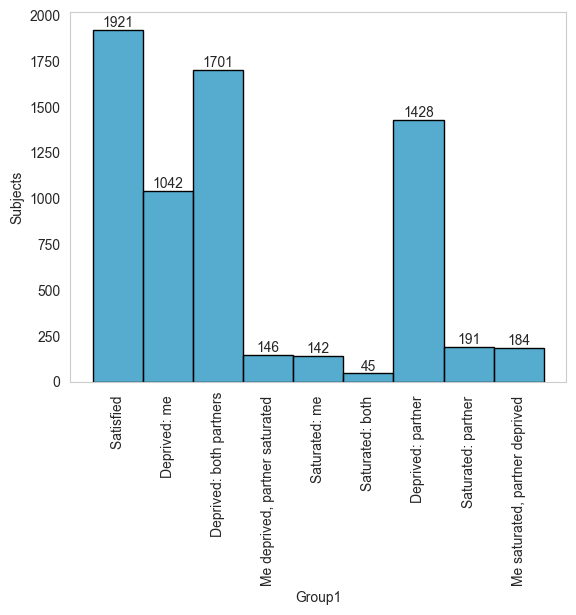

In [33]:
group_labels = [
    'Satisfied ', 'Deprived: me ',
    'Deprived: both partners', 'Me deprived, partner saturated ',
    'Saturated: me ', 'Saturated: both ',
    'Deprived: partner ', 'Saturated: partner ',
    'Me saturated, partner deprived '
]

df['Group1'] = pd.Categorical(
    df['Group1'], ['SubGroup1',  # Satisfied
                   'SubGroup2',  # Deprived: me
                   'SubGroup3',  # Deprived: both
                   'SubGroup4',  # Me deprived, partner saturated
                   'SubGroup5',  # Saturated: me
                   'SubGroup6',  # Saturated: both
                   'SubGroup7',  # Deprived: partner
                   'SubGroup8',  # Saturated: partner
                   'SubGroup9'   # Me saturated, partner deprived
                   ]
)

ax = sns.histplot(
    data=df, x='Group1',
    element='bars',
    binwidth=0.5,
    color='#1d91c0',
    common_norm=False,
    multiple="dodge",
    linewidth=1,
    edgecolor='black',
)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.ylabel("Subjects")
ti = plt.xticks(rotation=90, ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=group_labels)

In [34]:
# 1- How many (%) are in Agreement with touch
df.groupby(by=["Group1"]).count()["Id"] / len(df) * 100

Group1
SubGroup1    28.250000
SubGroup2    15.323529
SubGroup3    25.014706
SubGroup4     2.147059
SubGroup5     2.088235
SubGroup6     0.661765
SubGroup7    21.000000
SubGroup8     2.808824
SubGroup9     2.705882
Name: Id, dtype: float64

In [35]:
condition1 = (
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] == 0)
)

condition2 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] == 0) |
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] > 0)
)

condition3 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] == 0) |
        (df['Anchor Divergence'] == 0) & (df['Partner Divergence'] < 0)
)

condition4 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] > 0)
)

condition5 = (
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] < 0)
)

condition6 = (
        (df['Anchor Divergence'] > 0) & (df['Partner Divergence'] < 0) |
        (df['Anchor Divergence'] < 0) & (df['Partner Divergence'] > 0)
)

df.loc[condition1, 'Group2'] = 'Couple Agreement'
df.loc[condition2, 'Group2'] = 'One-sided Deprivation'
df.loc[condition3, 'Group2'] = 'One-sided Saturation'
df.loc[condition4, 'Group2'] = 'Couple Deprivation'
df.loc[condition5, 'Group2'] = 'Couple Saturation'
df.loc[condition6, 'Group2'] = 'Couple Disagreement'

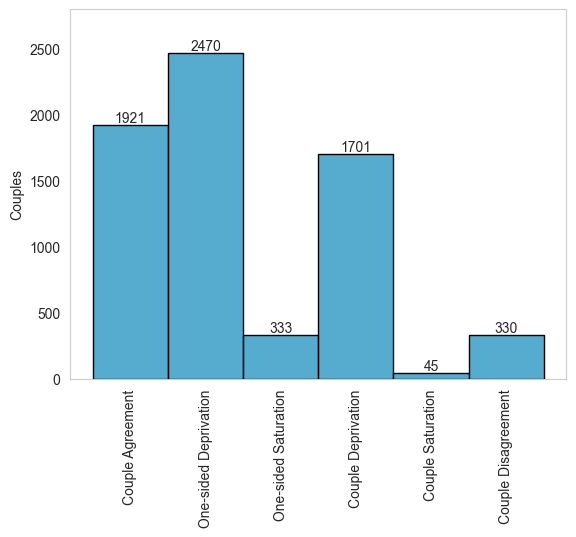

In [36]:
df['Group2'] = pd.Categorical(
    df['Group2'], ['Couple Agreement',
                   'One-sided Deprivation',
                   'One-sided Saturation',
                   'Couple Deprivation',
                   'Couple Saturation',
                   'Couple Disagreement']
)
ax = sns.histplot(data=df, x='Group2',
                  element='bars',
                  binwidth=0.5,
                  color='#1d91c0',
                  common_norm=False,
                  multiple="dodge",
                  linewidth=1,
                  edgecolor='black',
                  )
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.ylabel("Couples")
plt.xlabel("")
plt.xticks(rotation=90, )
plt.ylim(0, 2800)
plt.savefig('output/img_bg/subgroup_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

In [37]:
df.groupby(by=["Group2"]).count()["Id"] / len(df) * 100

Group2
Couple Agreement         28.250000
One-sided Deprivation    36.323529
One-sided Saturation      4.897059
Couple Deprivation       25.014706
Couple Saturation         0.661765
Couple Disagreement       4.852941
Name: Id, dtype: float64

In [38]:
df["Anchor Perception of Touch"] = "Satisfied"
df["Partner Perception of Touch"] = "Satisfied"

temp1 = df["Anchor Divergence"]
df.loc[temp1 > 0, "Anchor Perception of Touch"] = "Deprived"
df.loc[temp1 < 0, "Anchor Perception of Touch"] = "Saturated"

temp2 = df["Partner Divergence"]
df.loc[temp2 > 0, "Partner Perception of Touch"] = "Deprived"
df.loc[temp2 < 0, "Partner Perception of Touch"] = "Saturated"

In [39]:
df.to_csv('source/FReDA3.csv', index=False)

In [40]:
couple_vars = [
    'Id', 'Relationship Sex', 'Relationship Length', 'Cohabitation', 'Kids', 'Married',
    'Age difference', 'Couple Frequency of Touch', 'Couple Wish for Touch',
    'Couple Divergence', 'Group1', 'Group2'
]

# --- Separate the Anchor and Partner data ---
anchor_df = df.filter(regex='^Anchor |^Id$').copy()
partner_df = df.filter(regex='^Partner |^Id$').copy()

# --- Rename columns (remove prefixes) ---
anchor_df.columns = anchor_df.columns.str.replace('Anchor ', '', regex=False)
partner_df.columns = partner_df.columns.str.replace('Partner ', '', regex=False)

# --- Add role labels ---
anchor_df['Role'] = 'Anchor'
partner_df['Role'] = 'Partner'

# --- Rename Id to CoupleId before combining ---
anchor_df = anchor_df.rename(columns={'Id': 'CoupleId'})
partner_df = partner_df.rename(columns={'Id': 'CoupleId'})

# --- Combine Anchor and Partner rows ---
df_long = pd.concat([anchor_df, partner_df], ignore_index=True)

# --- Merge couple-level data ---
df_long = df_long.merge(df[couple_vars].rename(columns={'Id': 'CoupleId'}), on='CoupleId', how='left')

# Optional: reorder columns
cols = ['CoupleId', 'Role'] + [c for c in df_long.columns if c not in ['CoupleId', 'Role']]
df_long = df_long[cols]

In [41]:
df_long.to_csv('source/FReDA4.csv', index=False)

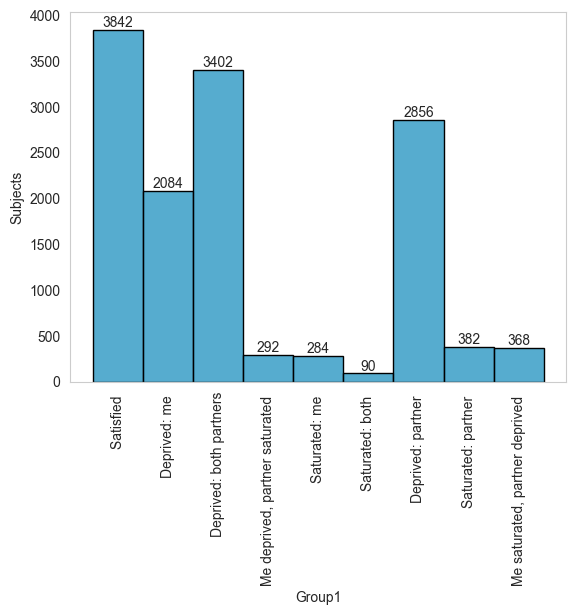

In [45]:
group_labels = [
    'Satisfied ', 'Deprived: me ',
    'Deprived: both partners', 'Me deprived, partner saturated ',
    'Saturated: me ', 'Saturated: both ',
    'Deprived: partner ', 'Saturated: partner ',
    'Me saturated, partner deprived '
]

df['Group1'] = pd.Categorical(
    df['Group1'], ['SubGroup1',
                   'SubGroup2',
                   'SubGroup3',
                   'SubGroup4',
                   'SubGroup5',
                   'SubGroup6',
                   'SubGroup7',
                   'SubGroup8',
                   'SubGroup9'
                   ]
)

ax = sns.histplot(data=df_long, x='Group1',
                  element='bars',
                  binwidth=0.5,
                  color='#1d91c0',
                  common_norm=False,
                  multiple="dodge",
                  linewidth=1,
                  edgecolor='black',
                  )
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.ylabel("Subjects")

plt.xticks(rotation=90, ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=group_labels);

In [25]:
df.groupby(by=["Group1"]).count()["Id"] / len(df) * 100

Group1
SubGroup1    28.250000
SubGroup2    15.323529
SubGroup3    25.014706
SubGroup4     2.147059
SubGroup5     2.088235
SubGroup6     0.661765
SubGroup7    21.000000
SubGroup8     2.808824
SubGroup9     2.705882
Name: Id, dtype: float64

In [26]:
def val_to_category(val):
    if val < 0.5:
        return 0
    elif val < 2:
        return 1
    elif val < 3:
        return 2
    elif val < 4:
        return 3
    elif val < 5:
        return 4
    else:
        return 5


df_long['Frequency of Touch'] = df_long['Frequency of Touch'].apply(val_to_category)
df_long['Wish for Touch'] = df_long['Wish for Touch'].apply(val_to_category)

overall = (
    df_long['Frequency of Touch']
    .value_counts()
    .sort_index()
    .rename_axis('Frequency of Touch')
    .reset_index(name='Count')
)
overall['Percent'] = (overall['Count'] / overall['Count'].sum()) * 100

cross = pd.crosstab(df_long['Group1'], df_long['Frequency of Touch'], margins=False)
cross_percent = cross.div(cross.sum(axis=1), axis=0) * 100
cross_combined = cross.astype(str) + " (" + cross_percent.round(1).astype(str) + "%)"

In [27]:
df_summary = (
    df_long.groupby('Group1')['Divergence']
    .agg(['mean', 'std', 'median'])
    .reset_index()
)